## POSTTEST3

><p> Nama : Tito Darmawan <br> NIM : 2109106042 <br> Dataset : </p>

[Goodreads-books](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks)

### Dataset Teratas

In [194]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("books.csv", on_bad_lines="skip")
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


### Grafik Pie<br>
#### Jumlah buku bahasa inggris dan variasi inggris lainnya
> <b> Jumlah bahasa inggris mendominasi sehingga kebanyakan bahasa lain kurang terlihat, maka pengkategorian di lakukan ke inggis saja
  
> <br> eng = Inggris Umum
  <br> en-CA = Inggris Canada
  <br> en-US = Inggris United State
  <br> en-GB = Inggris Great Britain (UK)

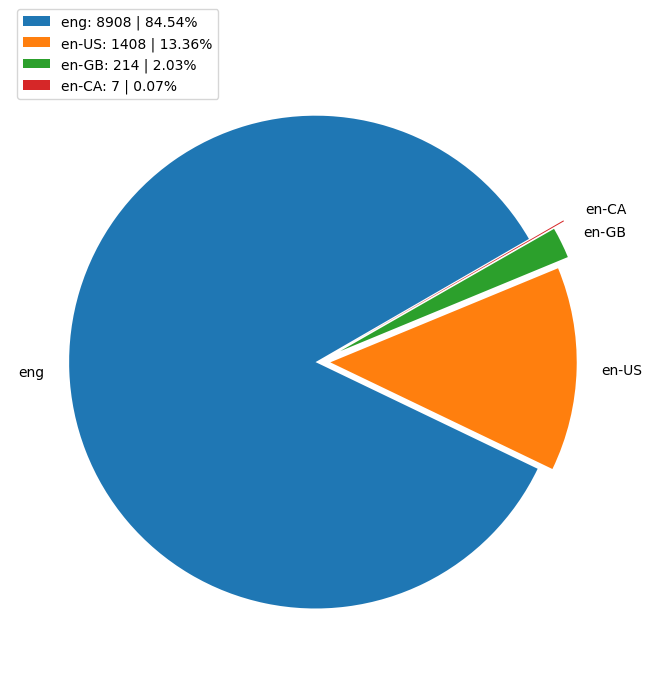

In [195]:
data_lang = df["language_code"].value_counts().rename_axis("language_code").reset_index(name="persentase")
data_show = data_lang.loc[data_lang['language_code'].isin(["eng", "en-US", "en-GB", "en-CA"])]

plt.figure(figsize=(8, 8))
plt.pie(
    data_show["persentase"],
    labels = ["eng", "en-US", "en-GB", "en-CA"],
    autopct="%.2f%%",
    startangle = 30,
    radius = (1),
    explode = (0.01, 0.05, 0.1, 0.15)
)

labels = [f'{l}: {s} | {s / data_show["persentase"].sum() * 100 :0.2f}%' for l, s in zip(data_show["language_code"], data_show["persentase"])]
plt.legend(bbox_to_anchor=(0, 1), loc=6, labels=labels)
plt.show()

### Grafik Bar<br>
#### Jumlah buku bahasa inggris dan variasi inggris lainnya
> eng = Inggris Umum
  <br> en-CA = Inggris Canada
  <br> en-US = Inggris United State
  <br> en-GB = Inggris Great Britain (UK)
  
> <b> Pada bar terlihat bahwa jumlah bahasa inggris UK cukup sedikit sampai tidak muncul (hanya 7) walaupun merupakan bahasa inggris yang tidak asing atau lumayan diketahui orang.

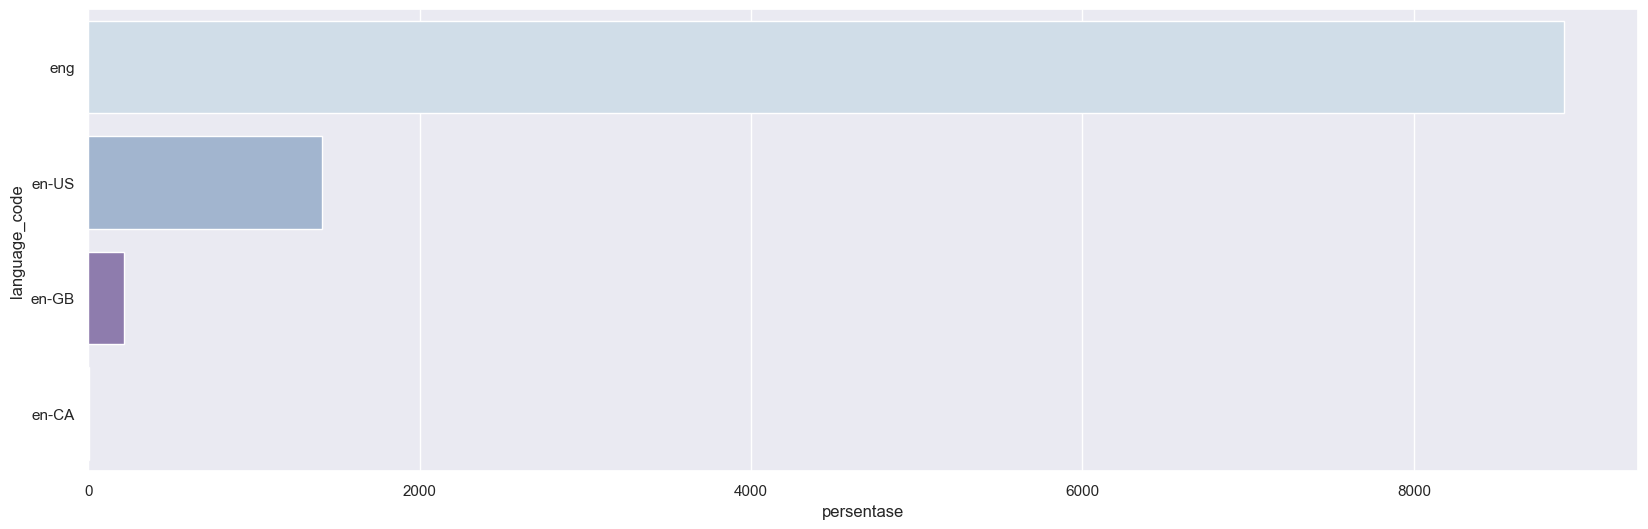

In [222]:
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data = data_show, y="language_code", x="persentase", palette="BuPu")
plt.show()

### Heatmap<br>
> Buku dengan banyak halaman cendrung memiliki rating tinggi

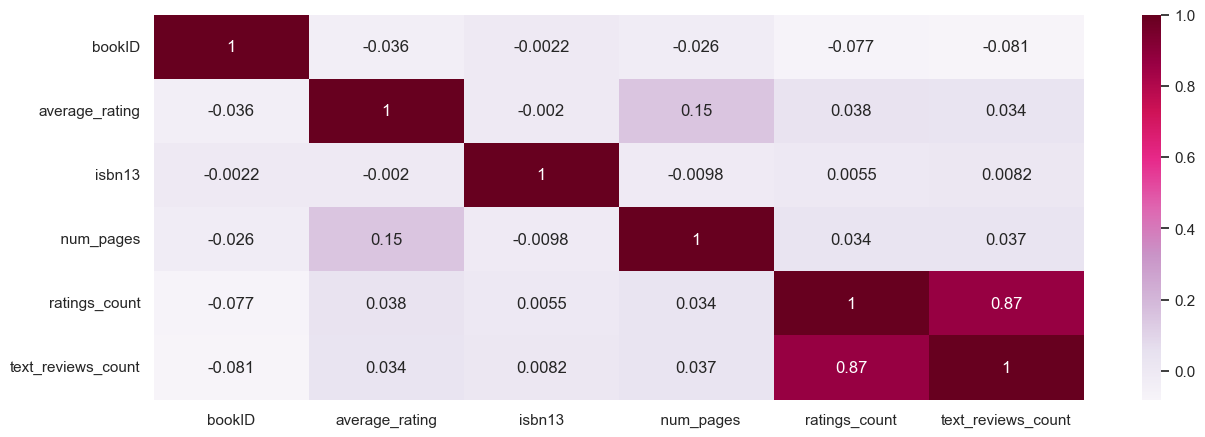

In [228]:
plt.figure(figsize=(15, 5))
sns.heatmap(
    df.corr(),
    annot = True,
    cmap = "PuRd"
)
plt.show()